In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [3]:
base_path = "/kaggle/input/human-activity-recognition-with-smartphones/"
train = pd.read_csv(base_path + "train.csv")
test = pd.read_csv(base_path + "test.csv")

X_train = train.iloc[:, :-1].values
y_train = train.iloc[:, -1].values
X_test = test.iloc[:, :-1].values
y_test = test.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

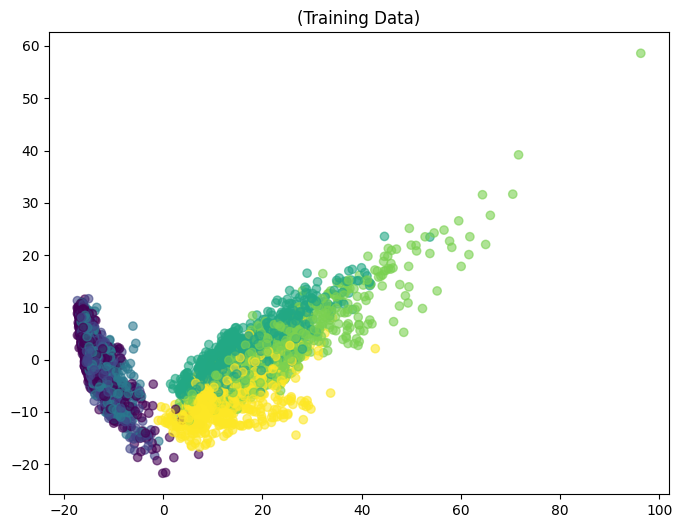

In [4]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)
X_test_std = scaler.transform(X_test)

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_std)
X_val_pca = pca.transform(X_val_std)
X_test_pca = pca.transform(X_test_std)

pca_prova = PCA(n_components=2)
X_prova = pca_prova.fit_transform(X_train_std)

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

plt.figure(figsize=(8, 6))
plt.scatter(X_prova[:, 0], X_prova[:, 1], c=y_train_encoded, cmap='viridis', alpha=0.6)
plt.title("(Training Data)")
plt.show()

label_reali  LAYING  SITTING  STANDING  WALKING  WALKING_DOWNSTAIRS  \
cluster                                                               
0               734      661       627        0                   0   
1                 0        0         0       57                 116   
2                 9        1         0      500                 151   
3               384      362       471        0                   0   
4                 0        0         0        0                  28   
5                 0        0         0      422                 485   

label_reali  WALKING_UPSTAIRS  
cluster                        
0                           0  
1                           1  
2                         678  
3                           0  
4                          66  
5                         128  


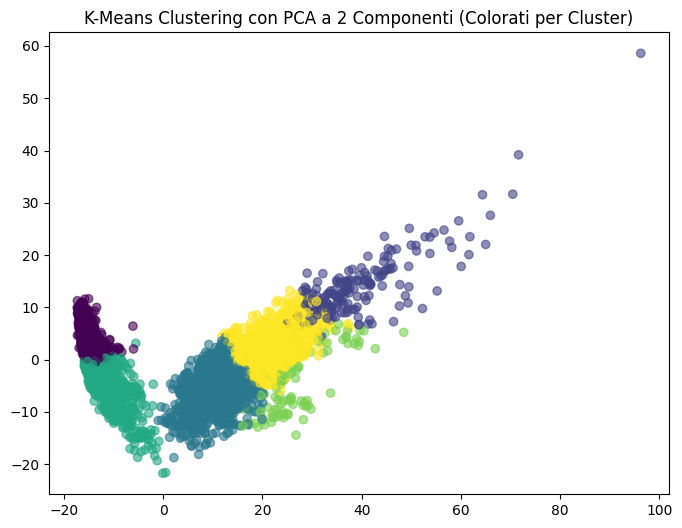

In [22]:
kmeans = KMeans(n_clusters=6, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(X_train_pca)

labels = pd.DataFrame({'cluster': clusters, 'label_reali': y_train})
distribuzione_cluster = pd.crosstab(labels['cluster'], labels['label_reali'])
print(distribuzione_cluster)

plt.figure(figsize=(8, 6))
plt.scatter(X_prova[:, 0], X_prova[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering con PCA a 2 Componenti (Colorati per Cluster)")
plt.show()

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_pca, y_train)
y_val_pred_mlp = mlp.predict(X_val_pca)
accuracy_mlp = accuracy_score(y_val, y_val_pred_mlp)
precision_mlp = precision_score(y_val, y_val_pred_mlp, average='weighted')
recall_mlp = recall_score(y_val, y_val_pred_mlp, average='weighted')
f1_mlp = f1_score(y_val, y_val_pred_mlp, average='weighted')

In [7]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_pca, y_train)
y_val_pred_rf = random_forest.predict(X_val_pca)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
precision_rf = precision_score(y_val, y_val_pred_rf, average='weighted')
recall_rf = recall_score(y_val, y_val_pred_rf, average='weighted')
f1_rf = f1_score(y_val, y_val_pred_rf, average='weighted')

In [8]:
risultati_validation = pd.DataFrame({
    'Accuracy': [accuracy_mlp, accuracy_rf],
    'Precision': [precision_mlp, precision_rf],
    'Recall': [recall_mlp, recall_rf],
    'F1-Score': [f1_mlp, f1_rf]
}, index=['MLPClassifier', 'Random Forest'])
print(risultati_validation)

               Accuracy  Precision    Recall  F1-Score
MLPClassifier  0.968049   0.968107  0.968049  0.968049
Random Forest  0.934738   0.936413  0.934738  0.934346


In [9]:
if accuracy_mlp >= accuracy_rf:
    migliore = 'MLPClassifier'
    modello = mlp
else:
    migliore = 'RandomForest'
    modello = random_forest

print("Il modello migliore è:", migliore)

Il modello migliore è: MLPClassifier


In [10]:
y_test_pred_mlp = modello.predict(X_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred_mlp)
test_precision = precision_score(y_test, y_test_pred_mlp, average='weighted')
test_recall = recall_score(y_test, y_test_pred_mlp, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_mlp, average='weighted')

risultati_test = pd.DataFrame({
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1-Score': test_f1
}, index=[migliore])
print(risultati_test)

               Accuracy  Precision   Recall  F1-Score
MLPClassifier   0.92942   0.931762  0.92942  0.929466
